In [392]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns


In [393]:
# Load dataset
file_path = './HousingDataMerged.csv'
housing_data = pd.read_csv(file_path)

In [394]:
# identifying the missing data
missing_values = housing_data.isnull().sum()

print(missing_values)

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64


In [395]:
print(housing_data.head())

         Suburb            Address  Rooms Type    Price Method   SellerG  \
0     Gowanbrae     1 Gowanbrae Dr      3    h   631000      S    Nelson   
1  Malvern East      1/13 Goode St      3    h  1210000      S  Marshall   
2    Hughesdale    1/13 Swindon Rd      2    u   516000      S       Ray   
3     Reservoir  1/147 Purinuan Rd      2    u   415000     PI       Ray   
4     Reservoir  1/21 Dumbarton St      3    u   475000      S       Ray   

     Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  9/3/16      13.6      3043  ...         2    2       608         138.0   
1  9/3/16      11.2      3145  ...         2    1       337         146.0   
2  9/3/16      13.0      3166  ...         1    1         0          76.0   
3  9/3/16      11.2      3073  ...         1    1       189          84.0   
4  9/3/16      11.2      3073  ...         1    1       191         107.0   

   YearBuilt           CouncilArea Lattitude  Longtitude  \
0       2001  Banyul

/var/folders/04/zc8l2qbd6pg6znw0k93vpplw0000gn/T/ipykernel_9441/103017353.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['${:.0f}'.format(x) for x in current_values])


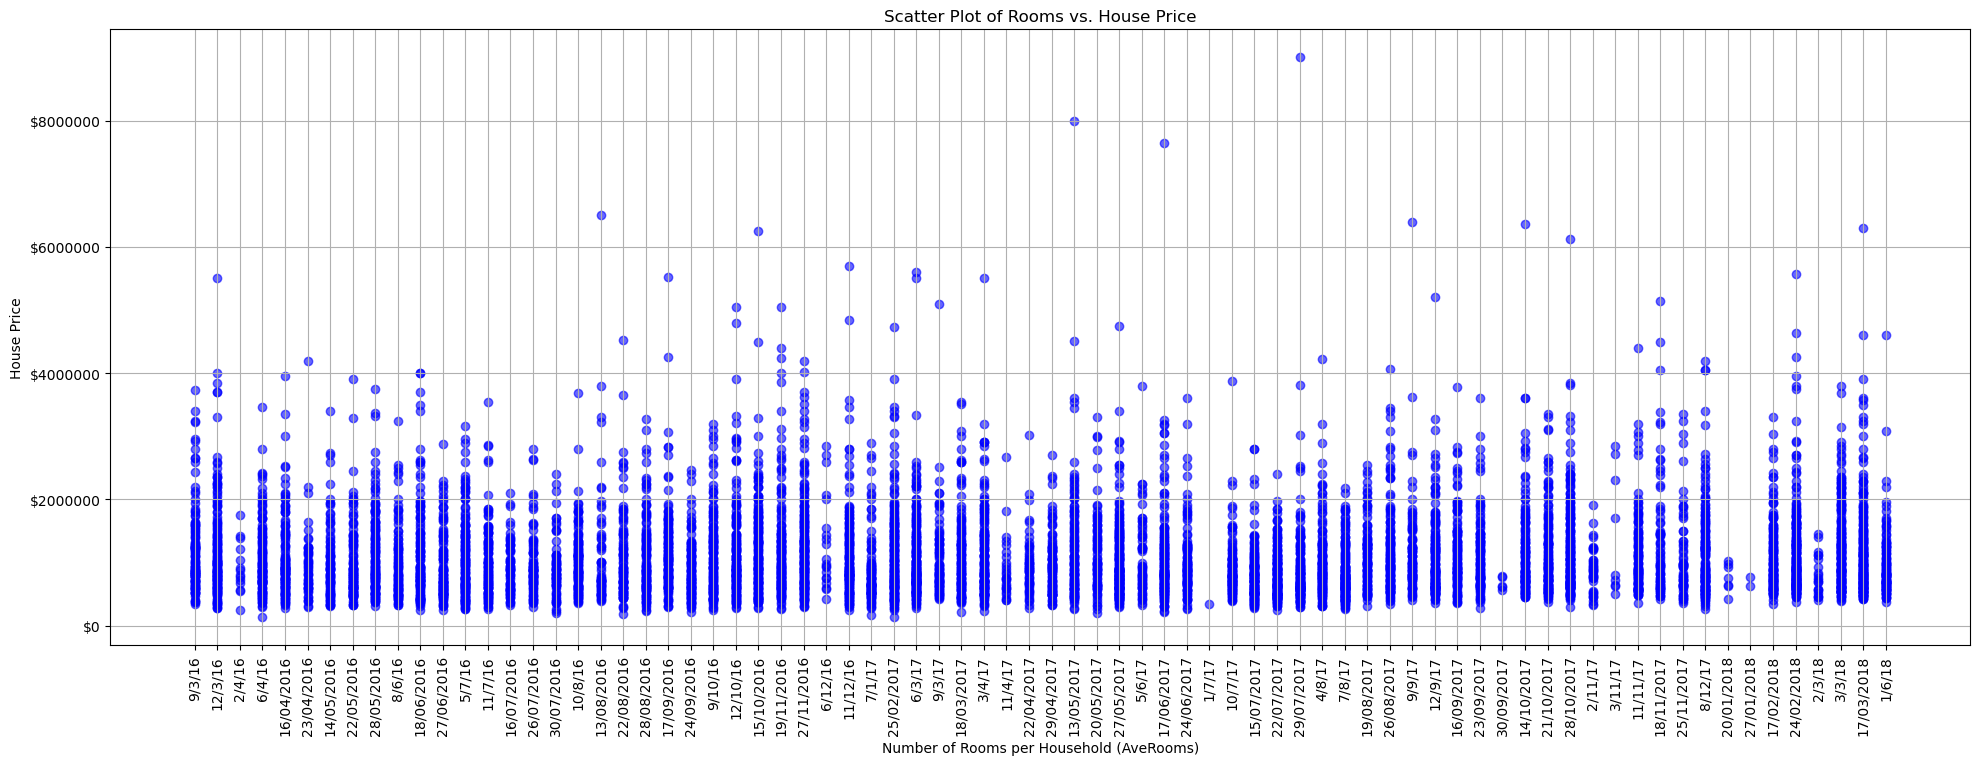

In [396]:
plt.figure(figsize=(24, 8))
plt.scatter(housing_data['Date'], housing_data['Price'], alpha=0.6, color='b')
plt.title('Scatter Plot of Rooms vs. House Price')
plt.xlabel('Number of Rooms per Household (AveRooms)')
plt.ylabel('House Price')
plt.xticks(rotation=90)
plt.grid(True)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:.0f}'.format(x) for x in current_values])
plt.show()

/var/folders/04/zc8l2qbd6pg6znw0k93vpplw0000gn/T/ipykernel_9441/1377867456.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['${:.0f}'.format(x) for x in current_values])


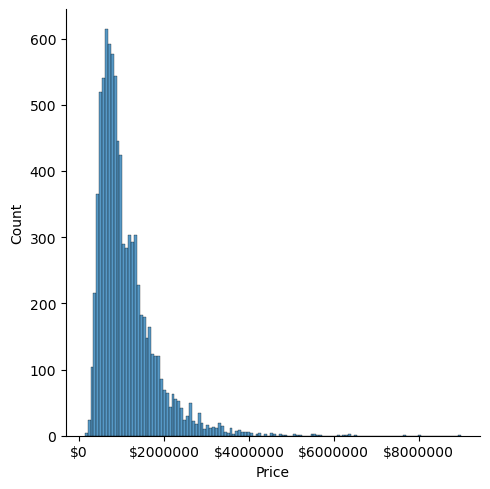

In [397]:
sns.displot(housing_data['Price'])
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['${:.0f}'.format(x) for x in current_values])


plt.show()

In [398]:
housing_data = housing_data.join(pd.get_dummies(housing_data.Type)).drop(['Type'], axis=1)

/var/folders/04/zc8l2qbd6pg6znw0k93vpplw0000gn/T/ipykernel_9441/476948418.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  housing_data.Date = pd.to_datetime(housing_data.Date)


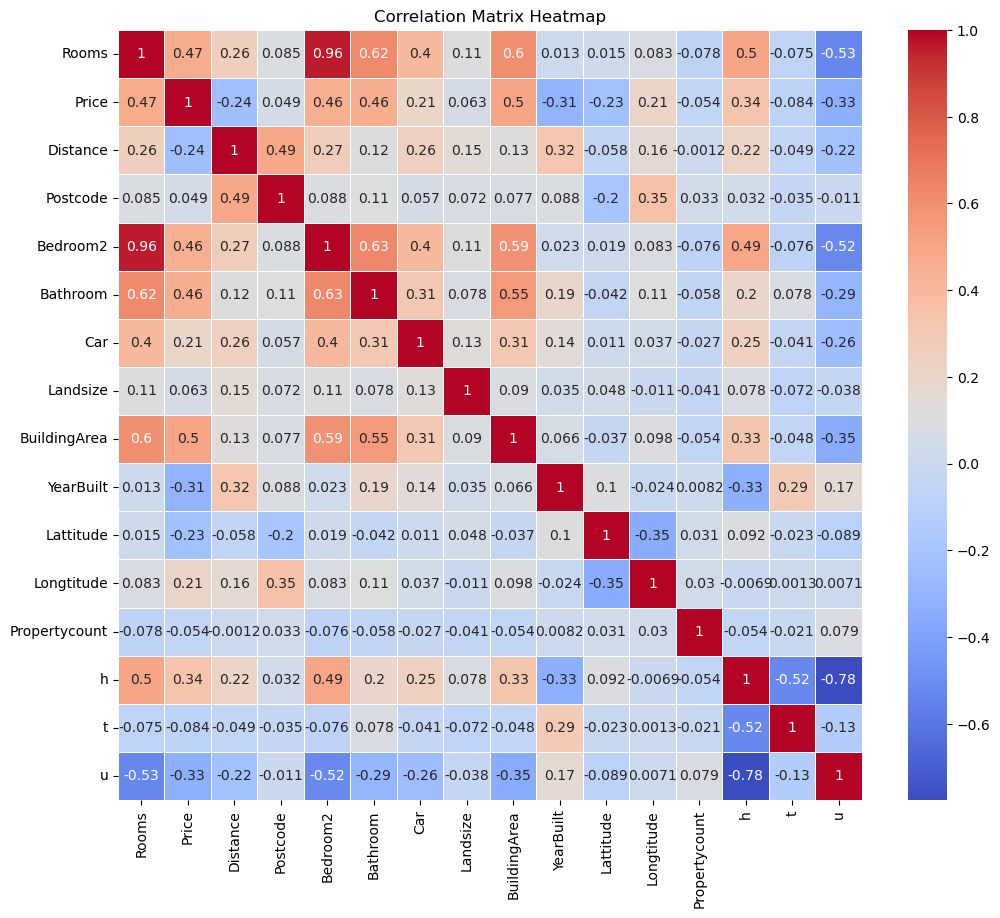

In [399]:
plt.figure(figsize=(12, 10))
housing_data.Date = pd.to_datetime(housing_data.Date)
housing_data_no_strs = housing_data.drop(['Suburb', 'Address', 'Date', 'SellerG', 'Method', 'CouncilArea', 'Regionname'],  axis=1)
corr_matrix = housing_data_no_strs.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [400]:
# X = housing_data_no_strs.drop('Price', axis=1)
X = housing_data_no_strs[['Rooms']]
y = housing_data_no_strs['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [401]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [402]:
# Predict the results on the test set
y_pred = model.predict(X_test)

# Print model performance
print('Mean Squared Error: %.2f' % mean_squared_error(y_test, y_pred))
print('R^2 Score: %.2f' % r2_score(y_test, y_pred))

Mean Squared Error: 428632581691.09
R^2 Score: 0.22


In [403]:
model.score(X_train, y_train)

0.22227723244992315

In [404]:
model.score(X_test, y_test)

0.22352832365238173

In [405]:
print(X_test.size)
print(y_test.size)

1715
1715


/var/folders/04/zc8l2qbd6pg6znw0k93vpplw0000gn/T/ipykernel_9441/1746071776.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['${:.0f}'.format(x) for x in current_values])


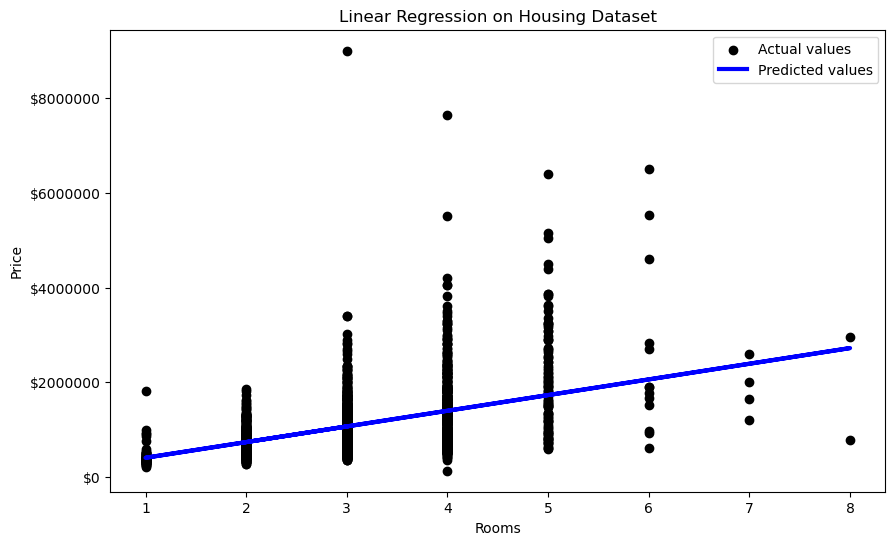

In [406]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black', label='Actual values')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Predicted values')
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.title('Linear Regression on Housing Dataset')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:.0f}'.format(x) for x in current_values])
plt.legend()
plt.show()

In [407]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [408]:
lasso_reg.score(X_test, y_test)

0.22352241281810747